In [1]:
# Import Dependencies
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Use Pandas data frame to read csv data
completion_df1 = pd.read_csv("ComprehensiveData_2005-17_v1.csv")
completion_df1.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Master's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years,Unnamed: 8
0,100654,Alabama A & M University,2005.0,0.0,600.0,312.0,0.0,0.0,NaN
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,1223.0,0.0,12.0,NaN
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,374.0,0.0,0.0,NaN
3,100751,The University of Alabama,2005.0,0.0,2931.0,1283.0,0.0,0.0,NaN
4,100858,Auburn University,2005.0,0.0,3917.0,791.0,0.0,0.0,NaN


In [3]:
# convert NaN to '0' value
completion_df1.fillna(value=0)

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Master's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years,Unnamed: 8
0,100654,Alabama A & M University,2005.0,0.0,600.0,312.0,0.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,1223.0,0.0,12.0,0.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,374.0,0.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,1283.0,0.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,791.0,0.0,0.0,0.0
5,100937,Birmingham Southern College,2005.0,0.0,299.0,14.0,0.0,0.0,0.0
6,101116,South University-Montgomery,2005.0,63.0,9.0,0.0,0.0,0.0,0.0
7,101189,Faulkner University,2005.0,61.0,582.0,69.0,0.0,0.0,0.0
8,101213,FAULKNER UNIVERSITY,2005.0,0.0,0.0,0.0,0.0,0.0,0.0
9,101365,Herzing University-Birmingham,2005.0,69.0,57.0,0.0,0.0,0.0,0.0


In [4]:
# How many institutions are we starting with?
totalInstitutions = len(completion_df1)
print(totalInstitutions)

33085


In [5]:
# DELETE UNWANTED COLUMNS 
completion_df2 = completion_df1.drop(["DFR2005.Master's degree", "Unnamed: 8"], axis = 1)
completion_df2.head()

,unitid,institution name,year,DFR2005.Associate's degree,DFR2005.Bachelor's degree,DFR2005.Certificates of less-than 1-year,DFR2005.Certificates of 1 but less than 2 years
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [6]:
# RENAME COLUMNS
completion_df3 = completion_df2.rename(columns={
    "DFR2005.Associate's degree" : "Associate's Degree",
    "DFR2005.Bachelor's degree": "Bachelor's Degree", 
    "DFR2005.Certificates of less-than 1-year" : "Shorter Certificates",
    "DFR2005.Certificates of 1 but less than 2 years" : "Longer Certificates"})

completion_df3.head()

,unitid,institution name,year,Associate's Degree,Bachelor's Degree,Shorter Certificates,Longer Certificates
0,100654,Alabama A & M University,2005.0,0.0,600.0,0.0,0.0
1,100663,University of Alabama at Birmingham,2005.0,0.0,1622.0,0.0,12.0
2,100706,University of Alabama in Huntsville,2005.0,0.0,798.0,0.0,0.0
3,100751,The University of Alabama,2005.0,0.0,2931.0,0.0,0.0
4,100858,Auburn University,2005.0,0.0,3917.0,0.0,0.0


In [7]:
# Column rearrange    
completion_df4 = completion_df3[["unitid","year","institution name","Shorter Certificates","Longer Certificates","Associate's Degree","Bachelor's Degree"]]
completion_df4.head()

,unitid,year,institution name,Shorter Certificates,Longer Certificates,Associate's Degree,Bachelor's Degree
0,100654,2005.0,Alabama A & M University,0.0,0.0,0.0,600.0
1,100663,2005.0,University of Alabama at Birmingham,0.0,12.0,0.0,1622.0
2,100706,2005.0,University of Alabama in Huntsville,0.0,0.0,0.0,798.0
3,100751,2005.0,The University of Alabama,0.0,0.0,0.0,2931.0
4,100858,2005.0,Auburn University,0.0,0.0,0.0,3917.0


In [8]:
InstitutionCountsPerYear = completion_df4.groupby("year")["institution name"].count()
InstitutionCountsPerYear

year
2005.0    2544
2006.0    2544
2007.0    2544
2008.0    2544
2009.0    2544
2010.0    2544
2011.0    2544
2012.0    2544
2013.0    2544
2014.0    2544
2015.0    2544
2016.0    2544
2017.0    2544
Name: institution name, dtype: int64

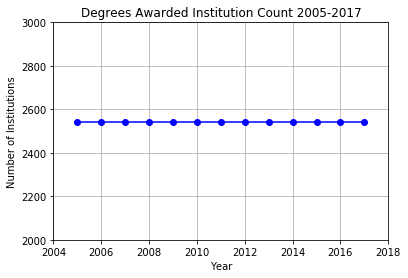

In [9]:
# create a line graph to visualize number of institutions
institutionCount = InstitutionCountsPerYear.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCount.set_ylim(ymin=2000, ymax=3000)
institutionCount.set_xlim(xmin=2004, xmax=2018)
plt.title("Degrees Awarded Institution Count 2005-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()
plt.savefig("Degrees Awarded Institution Count 2005-2017_fig.png")
plt.show()

##Completion data was collected from exact number of institution overtime. 

In [10]:
# Total Degrees Awarded per Year [*created data set to calculate the total number of degree awarded per year per institution
# type by using groupby function to add degree completed by using 'year' as filter; 
#then created a dictionary for this combined dataset]

# Shorter Certificates
df5 = completion_df4.groupby(["year"])["Shorter Certificates"].sum().astype(int)

# Longer Certificates
df6 = completion_df4.groupby(["year"])["Longer Certificates"].sum().astype(int)

# Associate's Degree
df7 = completion_df4.groupby(["year"])["Associate's Degree"].sum().astype(int)

# Bachelor's degree
df8 = completion_df4.groupby(["year"])["Bachelor's Degree"].sum().astype(int)


# Convert to DataFrame
CompletionPerYear = pd.DataFrame({"Shorter Certificates":df5,
                     "Longer Certificates": df6,
                     "Associates Degree": df7,
                     "Bachelors Degree" : df8,             
                    })

CompletionPerYear

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree
year,,,,
2005.0,48194,59231,120243,1316168
2006.0,46265,56939,120376,1347340
2007.0,43827,55046,123922,1373060
2008.0,43133,55825,118929,1404895
2009.0,49545,56789,120301,1433088
2010.0,61005,63941,125320,1467433
2011.0,47384,87168,142815,1511783
2012.0,47199,80349,149152,1565139
2013.0,39486,65412,136910,1587285


In [11]:
# COMPLETION SUMMARY data; add up Total Degree per year
completion_df5 = pd.concat([CompletionPerYear,pd.DataFrame(CompletionPerYear.sum(axis=1),columns=['Total_Degree'])],axis=1)
completion_df5

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree
year,,,,,
2005.0,48194,59231,120243,1316168,1543836
2006.0,46265,56939,120376,1347340,1570920
2007.0,43827,55046,123922,1373060,1595855
2008.0,43133,55825,118929,1404895,1622782
2009.0,49545,56789,120301,1433088,1659723
2010.0,61005,63941,125320,1467433,1717699
2011.0,47384,87168,142815,1511783,1789150
2012.0,47199,80349,149152,1565139,1841839
2013.0,39486,65412,136910,1587285,1829093


In [38]:
# % Undergrad increase 2005-2007:
percent_of_undergraduateIncrease_05_07 = 1316168/1373060*100
percent_of_undergraduateIncrease_05_07

95.8565539743347

In [39]:
# % Undergrad increase 2007-2017:
percent_of_undergraduateIncrease_07_17 = 1373060/1686498*100
percent_of_undergraduateIncrease_07_17

81.4148608536743

In [25]:
percent_of_undergrad = completion_df5["Bachelors Degree"]/completion_df5["Total_Degree"]*100
percent_of_undergrad

year
2005.0    85.253097
2006.0    85.767576
2007.0    86.039145
2008.0    86.573243
2009.0    86.345011
2010.0    85.430160
2011.0    84.497275
2012.0    84.976971
2013.0    86.779896
2014.0    87.719950
2015.0    88.643224
2016.0    89.522399
2017.0    89.982169
dtype: float64

In [21]:
percent_of_undergrad.mean()

86.73308573106078

In [ ]:
plt.pie(pie_in_cities, explode=explode, labels=pies, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)s
explode = (0.1,0,0,0,0,0,0,0,0,0)
colors = ["red", "orange", "lightcoral", "lightskyblue"]

plt.axis("equal")

In [ ]:
Pie charts:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to separate the "Python" section from the others
explode = (0.1, 0, 0, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
pies= ["Apple", "Pumpkin", "Chocolate Creme", "Cherry", "Apple Crumb", "Pecan", "Lemon Meringue", "Blueberry", "Key Lime", "Peach"]
pies_in_cities = [47,37,32,27,25,24,24,21,18,16]
colors = ["green","orange","brown","red","lightgreen","khaki",
        "lavender","magenta","lime","gold"]


#make it a circle for sure…tells matplotlib that we want a pie chart with equal axes


## Export DataFrame to .csv

In [12]:
completion_df5.to_csv('Completion data for_CombinedPlot.csv', sep=',')

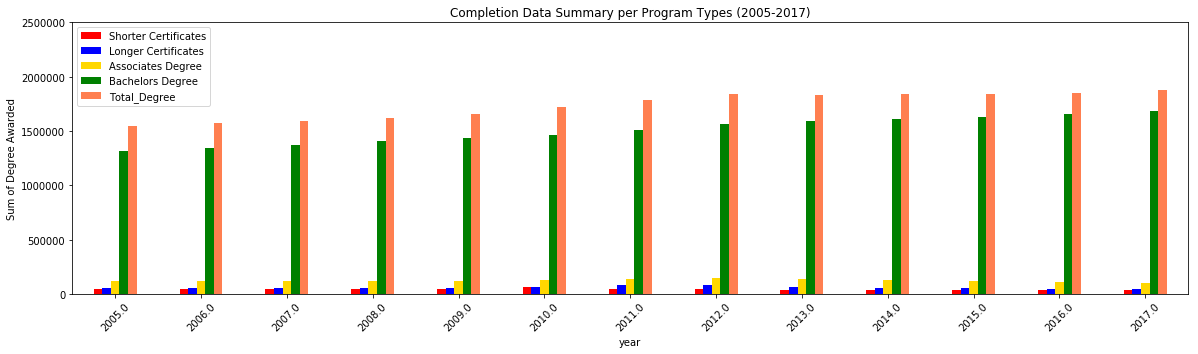

<Figure size 432x288 with 0 Axes>

In [13]:
multi_plot = completion_df5.plot(kind="bar", figsize=(20,5), color=['red', 'blue', 'gold', 'green', 'coral'])
multi_plot.set_xticklabels(completion_df5.index, rotation=45)
plt.ylim(-0, 2500000, 10000)
plt.title("Completion Data Summary per Program Types (2005-2017)")
plt.ylabel("Sum of Degree Awarded")
plt.savefig("Completion Data Summary per Program Types (2005-2017)")
plt.show()
plt.tight_layout()

In [14]:
# Set index for the plots below to work
completion_df6 = completion_df5.reset_index()
completion_df6

,year,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree
0,2005.0,48194,59231,120243,1316168,1543836
1,2006.0,46265,56939,120376,1347340,1570920
2,2007.0,43827,55046,123922,1373060,1595855
3,2008.0,43133,55825,118929,1404895,1622782
4,2009.0,49545,56789,120301,1433088,1659723
5,2010.0,61005,63941,125320,1467433,1717699
6,2011.0,47384,87168,142815,1511783,1789150
7,2012.0,47199,80349,149152,1565139,1841839
8,2013.0,39486,65412,136910,1587285,1829093
9,2014.0,38577,59048,127954,1611376,1836955


## Completion Rate Change over (2005-2017)

In [15]:
#Rate of change
completionRate=completion_df5["Total_Degree"]
completionRate

# create list to append annual rates of change to
completionRateOfChange = []

#calculate annual rates of change, append to empty change list created above, and create a new column 
# for the annual change rate data

start_rate=1543836

#the above needs to be the first value in your list (index location 0)

for rate in completionRate:
    try:
        change=((rate/start_rate)-1)*100
        completionRateOfChange.append(change)
        start_rate=rate
    except:
        print("Error happened")

completion_df5["Completion Annual Rate of Change"]=completionRateOfChange

completion_df5

,Shorter Certificates,Longer Certificates,Associates Degree,Bachelors Degree,Total_Degree,Completion Annual Rate of Change
year,,,,,,
2005.0,48194,59231,120243,1316168,1543836,0.000000
2006.0,46265,56939,120376,1347340,1570920,1.754331
2007.0,43827,55046,123922,1373060,1595855,1.587286
2008.0,43133,55825,118929,1404895,1622782,1.687309
2009.0,49545,56789,120301,1433088,1659723,2.276399
2010.0,61005,63941,125320,1467433,1717699,3.493113
2011.0,47384,87168,142815,1511783,1789150,4.159693
2012.0,47199,80349,149152,1565139,1841839,2.944918
2013.0,39486,65412,136910,1587285,1829093,-0.692026


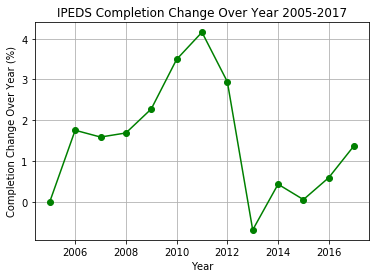

In [16]:
xComplete=completion_df5.index
yComplete=completion_df5["Completion Annual Rate of Change"]
plt.plot(xComplete,yComplete, color='green', marker ='o')
plt.plot(x_compat=True)
plt.title("IPEDS Completion Change Over Year 2005-2017")
plt.xlabel("Year")
plt.ylabel("Completion Change Over Year (%)")
plt.grid()
plt.savefig("IPEDS Completion Change Over Year 2005-2017")
plt.show()

## Trend in Degree Awarded from Different Institution Type

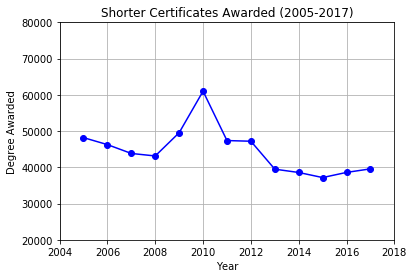

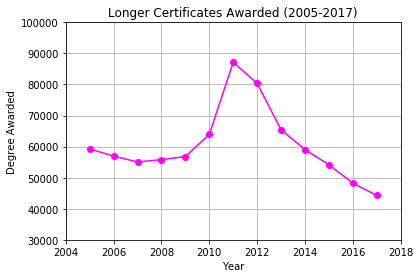

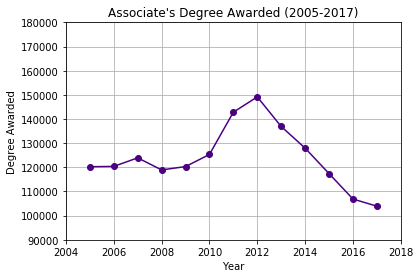

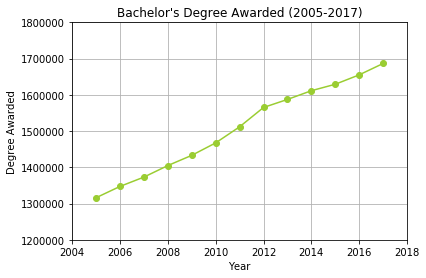

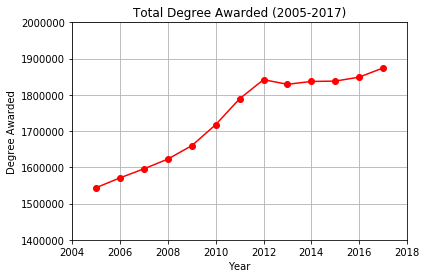

In [17]:
# trends for Shorter Certificates
xc=completion_df6["year"]
yc=completion_df6["Shorter Certificates"]
plt.plot(xc,yc, color="blue",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([20000, 80000])
plt.title("Shorter Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Shorter Certificates Awarded (2005-2017)")
plt.show()

# trends for Longer Certificates
xc=completion_df6["year"]
yc=completion_df6["Longer Certificates"]
plt.plot(xc,yc, color="magenta",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([30000, 100000])
plt.title("Longer Certificates Awarded (2005-2017)")
plt.grid()
plt.savefig("Longer Certificates Awarded (2005-2017)")
plt.show()

# trends for Associate's Degree
xc=completion_df6["year"]
yc=completion_df6["Associates Degree"]
plt.plot(xc,yc, color="indigo",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([90000, 180000])
plt.title("Associate's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Associate's Degree Awarded (2005-2017)")
plt.show()

# trends for Bachelor's Degree
xc=completion_df6["year"]
yc=completion_df6["Bachelors Degree"]
plt.plot(xc,yc, color="yellowgreen",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1200000, 1800000])
plt.title("Bachelor's Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Bachelor's Degree Awarded (2005-2017)")
plt.show()

# trends for All Degree
xc=completion_df6["year"]
yc=completion_df6["Total_Degree"]
plt.plot(xc,yc, color="red",marker ='o')
plt.xlabel("Year")
plt.ylabel("Degree Awarded")
plt.xlim([2004, 2018])
plt.ylim([1400000, 2000000])
plt.title("Total Degree Awarded (2005-2017)")
plt.grid()
plt.savefig("Total Degree Awarded (2005-2017)")
plt.show()

In [18]:
TotalAwardsPerYear = completion_df6.sum()
TotalAwardsPerYear

year                       26143.0
Shorter Certificates      579961.0
Longer Certificates       786376.0
Associates Degree        1614146.0
Bachelors Degree        19588344.0
Total_Degree            22568827.0
dtype: float64

In [26]:
DegreeAwarded_2005_2017 = pd.DataFrame({'Program Type':TotalAwardsPerYear.index, 'Awarded Total':TotalAwardsPerYear.values})
DegreeAwarded_2005_2017

,Program Type,Awarded Total
0,year,26143.0
1,Shorter Certificates,579961.0
2,Longer Certificates,786376.0
3,Associates Degree,1614146.0
4,Bachelors Degree,19588344.0
5,Total_Degree,22568827.0


In [27]:
Bachelors_Percentage = (19588344.0/22568827.0)*100
Bachelors_Percentage

86.7938063418183

## On average ~87% of total graduates had Bachelor's Degree. 

(-1.1030172104139364,
 1.1052742532893223,
 -1.1063305414689961,
 1.1063730650085546)

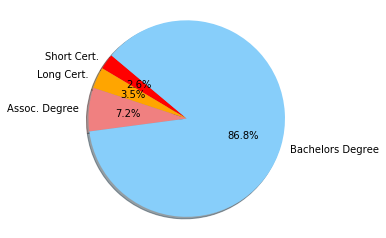

In [29]:
#Pie charts:
# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]
programs= ["Short Cert.", "Long Cert.", "Assoc. Degree", "Bachelors Degree"]
granted = [579961.0,786376.0,1614146.0,19588344.0]
plt.pie(granted,labels=programs, colors=colors,
       autopct="%1.1f%%", shadow=True, startangle=140)

#make it a circle for sure…tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")